In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (8,5)

In [8]:
df = pd.read_csv("books_data.csv")

df.head()

,Title,Price,Rating,Availability
0,A Light in the Attic,Â£51.77,Three,In stock
1,Tipping the Velvet,Â£53.74,One,In stock
2,Soumission,Â£50.10,One,In stock
3,Sharp Objects,Â£47.82,Four,In stock
4,Sapiens: A Brief History of Humankind,Â£54.23,Five,In stock


## Questions for Analysis

1. What is the average price of books?
2. Which rating appears most frequently?
3. Do higher rated books cost more?
4. Are all books in stock?
5. What is the price distribution?

In [9]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Title         20 non-null     str  
 1   Price         20 non-null     str  
 2   Rating        20 non-null     str  
 3   Availability  20 non-null     str  
dtypes: str(4)
memory usage: 772.0 bytes


In [10]:
df.dtypes

Title           str
Price           str
Rating          str
Availability    str
dtype: object

In [12]:
df = pd.read_csv("books_data.csv", encoding="utf-8")

This removes:

£
Â
any stray symbols

In [13]:
df["Price"] = df["Price"].str.replace(r"[^\d.]", "", regex=True)
df["Price"] = df["Price"].astype(float)

df.head()

,Title,Price,Rating,Availability
0,A Light in the Attic,51.77,Three,In stock
1,Tipping the Velvet,53.74,One,In stock
2,Soumission,50.10,One,In stock
3,Sharp Objects,47.82,Four,In stock
4,Sapiens: A Brief History of Humankind,54.23,Five,In stock


In [14]:
rating_map = {
    "One":1,
    "Two":2,
    "Three":3,
    "Four":4,
    "Five":5
}

df["Rating"] = df["Rating"].map(rating_map)

df.head()

,Title,Price,Rating,Availability
0,A Light in the Attic,51.77,3,In stock
1,Tipping the Velvet,53.74,1,In stock
2,Soumission,50.10,1,In stock
3,Sharp Objects,47.82,4,In stock
4,Sapiens: A Brief History of Humankind,54.23,5,In stock


In [15]:
df.describe()

,Price,Rating
count,20.000000,20.000000
mean,38.048500,2.850000
std,15.135231,1.565248
min,13.990000,1.000000
25%,22.637500,1.000000
50%,41.380000,3.000000
75%,51.865000,4.000000
max,57.250000,5.000000


In [16]:
df["Price"].mean()

np.float64(38.048500000000004)

In [17]:
df["Rating"].value_counts()

Rating
1    6
4    4
5    4
3    3
2    3
Name: count, dtype: int64

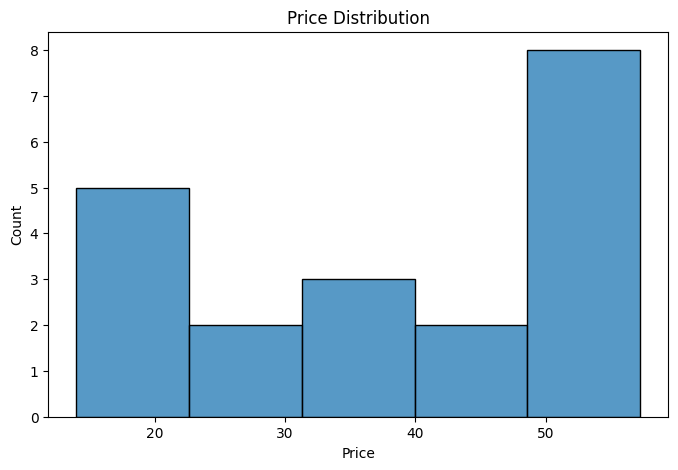

In [18]:
sns.histplot(df["Price"], bins=5)
plt.title("Price Distribution")
plt.show()

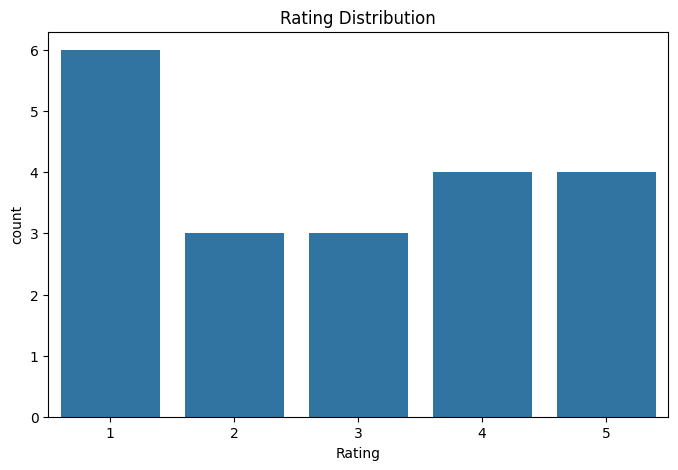

In [19]:
sns.countplot(x="Rating", data=df)
plt.title("Rating Distribution")
plt.show()

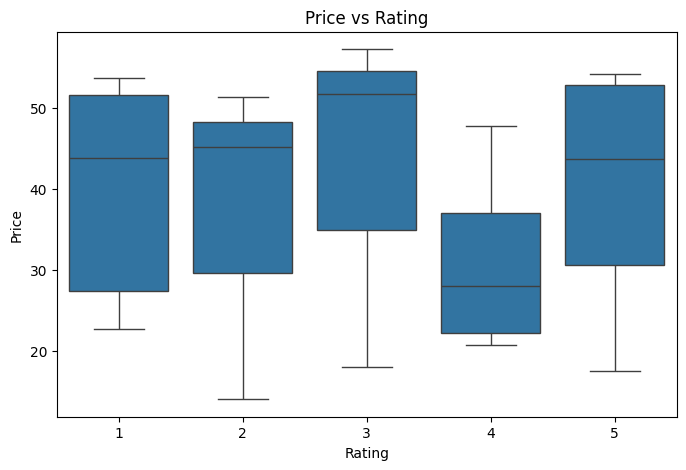

In [20]:
sns.boxplot(x="Rating", y="Price", data=df)
plt.title("Price vs Rating")
plt.show()

In [21]:
df["Availability"].value_counts()

Availability
In stock    20
Name: count, dtype: int64

In [22]:
df.isnull().sum()

Title           0
Price           0
Rating          0
Availability    0
dtype: int64

In [23]:
df.to_csv("cleaned_books_data.csv", index=False)

Data Issues Identified:
- Price was stored as string
- Rating was categorical text
- No missing values found
- Limited dataset (only 20 books from one page)